0.009765625
0.0010101010101


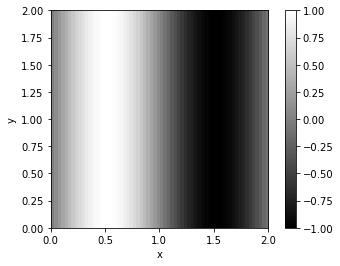

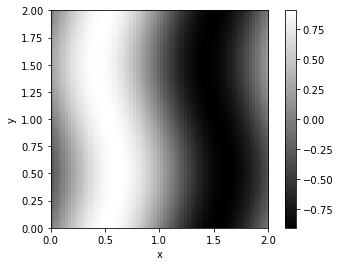

In [24]:
from integrators import RK4, RK4_timestepper, FE_timestepper
from tools import ScalarTool, VectorTool, create_grid, dt_cfl
from operators import OperatorKit
import numpy as np
import matplotlib.pyplot as plt
from copy import copy

# Parameters
L = 2.0
N = 64
kappa = 0.1
U=1

st = ScalarTool(N,L)
vt = VectorTool(N,L)
opkit = OperatorKit(N,L, kappa)


X = create_grid(N, L)
# th0_hat = st.fft(np.sin((2.0 * np.pi / L) * X[0]))
# okit = OperatorKit(N, L, kappa)

# def op_hat(th_hat):
#     return okit.sin_flow_op_hat(th_hat)

# st = ScalarTool(N, L)

# dt0 = dt_cfl(N,L,kappa,U) # largest time step
# print(dt0)
# tarray=np.linspace(0,0.1,100)
# print(tarray[1]-tarray[0])
# th_hat=RK4(op_hat, th0_hat, tarray)
# st.plot(np.real(st.ifft(th_hat[-1])))

th0 = np.sin((2.0 * np.pi / L) * X[0])
okit = OperatorKit(N, L, kappa)

def op(th):
    return okit.sin_flow_op(th)

st = ScalarTool(N, L)

dt0 = dt_cfl(N,L,kappa,U) # largest time step
print(dt0)
tarray=np.linspace(0,0.1,100)
print(tarray[1]-tarray[0])
th=RK4(op, th0, tarray)
st.plot(th[0])
plt.show()
st.plot(th[-1])
plt.show()

In [25]:
from integrators import RK4, RK4_timestepper, FE_timestepper
from tools import ScalarTool, VectorTool, create_grid, dt_cfl
from operators import OperatorKit
import numpy as np
import matplotlib.pyplot as plt
from copy import copy

# Parameters
L = 2.0
N = 64
kappa = 0.1
U=1

st = ScalarTool(N,L)
vt = VectorTool(N,L)
opkit = OperatorKit(N,L, kappa)


X = create_grid(N, L)
th0_hat = st.fft(np.sin((2.0 * np.pi / L) * X[0]))
okit = OperatorKit(N, L, kappa)

def op_hat(th_hat):
    return okit.sin_flow_op_hat(th_hat)

st = ScalarTool(N, L)

dt0 = dt_cfl(N,L,kappa,U) # largest time step
print(dt0)
tarray=np.linspace(0,0.1,100)
print(tarray[1]-tarray[0])
th_hat=RK4(op_hat, th0_hat, tarray)
st.plot(np.real(st.ifft(th_hat[-1])))

0.009765625
0.0010101010101


/Users/cmiless/Dropbox/projects/spde/integrators.py:39: ComplexWarning: Casting complex values to real discards the imaginary part
  th[0] = th0
/Users/cmiless/Dropbox/projects/spde/integrators.py:42: ComplexWarning: Casting complex values to real discards the imaginary part
  th[i] = RK4_timestepper(op, th[i - 1], dt)
